# Кластеризация

Кластеризация позволяет разбить объекты на группы, которые называются кластерами.

**Центроид** — это центр масс кластера, или среднее значение координат объектов кластера.

## Алгоритм K-MEANS

Идея алгоритма состоит в том, что он разбивает множество элементов векторного пространства на заранее заданное пользователем число кластеров, а далее стремится минимизировать суммарное квадратичное отклонение объектов внутри кластера до центроида кластера.

Алгоритм:

1. Решаем, на сколько кластером хотим разделить данные
2. Чтобы сформировать кластеры, случайным образом выбираем три объекта из датасета. Эти три объекта будут представлять три разных кластера (жёлтый, розовый и зелёный). Так как в этих кластерах находится по одному объекту, то эти объекты будут считаться исходными центроидами кластеров.
3. Распределим оставшиеся объекты датасета по трём кластерам.

Считается, что объект принадлежит к тому кластеру, к центроиду которого он находится ближе всего.

Возьмём первый объект датасета и рассчитаем расстояние (L1, L2 и L3) от этого объекта до центроида каждого кластера.

4. Теперь в каждом из кластеров больше одного объекта, и центр этих кластеров тоже изменился. Поэтому рассчитаем новые центроиды и для удобства выделим их на рисунке вертикальной линией
5. После этого для каждого объекта в выборке повторяем шаг 3, т. е. для каждого объекта датасета рассчитываем расстояние до центроидов.

Так как у нас новые кластеры, центроиды могли сильно измениться. Поэтому при подсчёте расстояний ближайшим к объекту может оказаться уже другой центроид. Значит, этот объект будет принадлежать к другому кластеру.

6. Шаг 5 повторяется до тех пор, пока объекты датасета не перестанут менять кластеры, к которым они относятся. Как только объекты перестают это делать, алгоритм завершается и мы переходим к шагу 7.

7. Далее для каждого кластера подсчитаем среднеквадратичное отклонение объектов кластера до центроида: для каждого кластера считаем сумму квадратов расстояний от элементов кластера до его центроида.

Находим суммарное отклонение.

8. Далее мы несколько раз заново запускаем алгоритм кластеризации, начиная с шага 2.

Зачем это нужно?

В шаге 1 мы выбирали первые объекты кластера случайным образом, но так можно выбрать не разные объекты, а те, что находятся рядом. В таком случае кластеризация получится некачественной.

Чтобы такого не происходило, мы повторяем весь алгоритм несколько раз, начиная с шага 2. В sklearn по умолчанию проводится десять итераций.

9. Среди получившихся кластеров нам необходимо найти наилучший вариант кластеризации.

Лучшей будет признана кластеризация с минимальным значением среднеквадратичного отклонения, которое рассчитывали на шаге 7.

In [1]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

# загружаем данные
df = pd.read_csv('data/Pokemon.csv')
# датасет содержит название покемона, уровень его защиты, силу атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


c:\Users\kuzin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

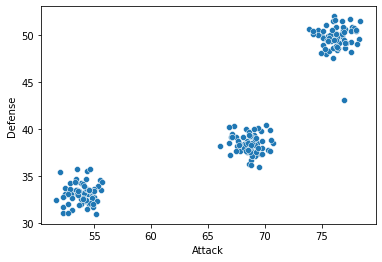

In [2]:
# попробуем кластеризовать покемонов по их силе атаки и уровню защиты
# для этого сохраним в матрицу X два интересующих нас признака: атаку и защиту
X = df[['Attack', 'Defense']]

#визуализируем
sns.scatterplot(df.Attack, df.Defense)

Инициализируем алгоритм k-means. При инициализации зададим параметры моделирования:

* n_clusters — количество кластеров;
* init — стратегия кластеризации;
* n_init — количество запусков алгоритма k-means;
* random_state — чтобы результаты воспроизводились от запуска к запуску.

c:\Users\kuzin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

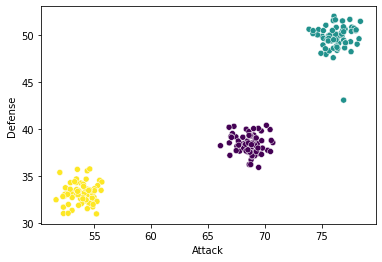

In [3]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#визуализируем результаты. Параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(df.Attack, df.Defense, c=predictions)

c:\Users\kuzin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

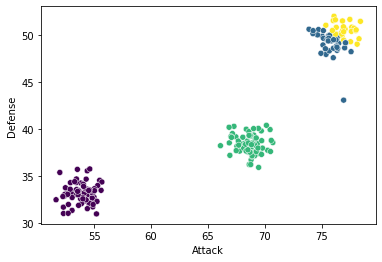

In [4]:
# инициализируем алгоритм k-means, с количеством кластеров 4
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k4'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов, для группировки объектов по цветам 
sns.scatterplot(df.Attack, df.Defense, c=df.Clusters_k4)

В данном случае мы проводили кластеризацию по двум признакам. Мы сделали это для того, чтобы можно было визуализировать результаты. Для кластеризации можно использовать и более двух признаков, однако в таком случае кластеризация будет проходить в -мерном пространстве (для трёх признаков пространство будет трёхмерным), и визуализировать результаты будет непросто.

In [5]:
# добавляем третий признак - скорость покемона, а алгоритм такой же
X = df[['Attack', 'Defense', 'Speed']]

# инициализируем алгоритм k-means, с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3_2d'] = predictions

**Недостатки алгоритма:**
1. Необходимо заранее знать, на сколько кластеров мы хотим разделить данные. В учебных примерах известно, каким должно быть k, и определить это значение довольно легко. В реальности данные сложнее и трудно заранее предугадать, сколько кластеров мы хотим получить.

2. Очевидно, что для объектов, которые в равной степени принадлежат к разным кластерам, алгоритм k-means будет отрабатывать плохо.

3. Алгоритм чувствителен к выбросам в данных, так как выбросы сильно искажают местонахождение центроида кластера.
4. Плохо работает на данных, которые образуют удлинённые кластеры, а также на кластерах неправильной формы.
5. Так как в самом начале работы алгоритма центроиды определяются случайным образом, результат сильно зависит от того, какие начальные объекты будут определены как центры кластеров.

### ОПРЕДЕЛЕНИЕ ОПТИМАЛЬНОГО K ДЛЯ АЛГОРИТМА K-MEANS

Рассмотрим, как побороть один из существенных недостатков алгоритма, а именно — как подобрать оптимальное количество кластеров.

Для этого можно использовать несколько способов: метод локтя (elbow plot), статистику разрыва (Gap Statistic Method), коэффициент силуэта (Average Silhouette Method). Мы рассмотрим метод локтя и коэффициент силуэта.

### Метод локтя

Данный метод позволяет найти такое оптимальное число кластеров, чтобы добавление ещё одного кластера не приводило к лучшему моделированию данных.

Идея состоит в том, что в самом начале при добавлении новых кластеров качество моделирования улучшается. Эта область называется недообученной (underfitting).

Дальнейшее добавление новых кластеров существенно не улучшает качество моделирования, а значит стоит прекратить их добавление. Данная область называется переобученной (overfitting).

Чтобы определить оптимальное количество кластеров, используя метод локтя, необходимо нарисовать график, на котором по оси x будет отложено количество кластеров, а по оси y — инерция.

Инерция — это сумма квадратов расстояний объектов датасета до центра масс ближайшего к ним кластера.

Когда инерция быстро снижается, область считается недообученной, а далее, после «перегиба», идёт очень медленное снижение инерции, и область считается переобученной.


На графике видно, что линия напоминает локоть — отсюда и название метода. Оптимальное число кластеров находится как раз на «локтевом сгибе». 


Теперь реализуем это в виде кода. Нам нужно посчитать значение инерции для кластеризаций с разным количеством кластеров. Для этого напишем функцию get_inertia, которая будет принимать данные и количество кластеров и возвращать значение инерции:

<AxesSubplot:xlabel='cluster', ylabel='inertia'>

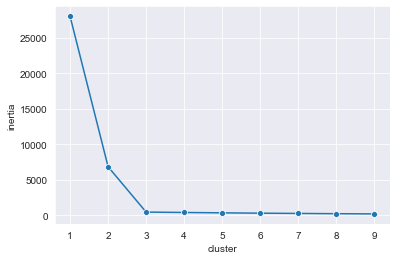

In [6]:
# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов,и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создадим пустой словарь, ключами будут инерция и количество кластеров
res = {"inertia": [], "cluster": []}

# выберем нужные данные 
X = df[['Attack', 'Defense']]

# итерируемся по разным размерам кластеров (от 1 до 9) и сохраним значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    res["inertia"].append(get_inertia(cluster_num, X))
    res["cluster"].append(cluster_num)

# сохраним в датафрейм значение инерции и количество кластеров
res_df = pd.DataFrame(res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=res_df, x="cluster", y="inertia", marker= "o")

### Метод силуэта

Если вдруг в ходе работы вы встречаете график, на котором невозможно найти «локоть», на помощь придёт **коэффициент силуэта**.

График силуэта, в отличие от графика локтя, имеет пиковый характер, поэтому его проще визуализировать и анализировать.

Коэффициент силуэта показывает, насколько объект похож на объекты кластера, в котором он находится, по сравнению с объектами из других кластеров.

Силуэт варьируется от -1 до +1: чем выше значение, тем больше объекты похожи на объекты своего кластера и меньше похожи на объекты соседних кластеров.

Если силуэт равен 1, это означает, что кластеры хорошо разделены между собой и имеют высокую плотность внутри себя.

<AxesSubplot:xlabel='cluster', ylabel='silhouette'>

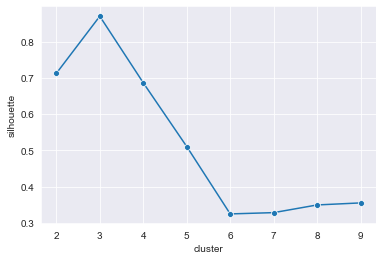

In [7]:
# импортируем метрику силуэт
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df[['Attack', 'Defense']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

Если вам нужно найти оптимальное количество кластеров для датасета, наиболее наглядным графиком будет график коэффициента силуэта, поэтому можно сразу воспользоваться им. Но стоит помнить, что для построения данного графика нужно минимум два кластера, так как мы сравниваем объекты одного кластера с другим, наиболее близким кластером.

### **МЕТРИКИ**

Ранее мы говорили, что кластеризация относится к методу машинного обучения без учителя и применяется, когда нет размеченных данных, а значит мы не знаем правильных ответов. Однако иногда размеченные данные всё же есть. В таком случае мы можем провести дополнительный анализ получившихся кластеров.

Существует ряд метрик, которые можно подсчитать, если данные размечены. Мы рассмотрим четыре метрики, которые больше всего помогут нам при анализе результатов кластеризации:

1. **ОДНОРОДНОСТЬ КЛАСТЕРОВ (HOMOGENEITY SCORE)**

Кластер считается однородным, если в нём содержатся объекты, принадлежащие только к одному кластеру.


In [8]:
# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))

1.0


In [9]:
# передадим информацию о том, какие на самом деле должны быть кластеры и результаты предсказания
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
# 1.0
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))
# 1.0

1.0
1.0


2. **ПОЛНОТА КЛАСТЕРА (COMPLETENESS SCORE)**

Значение данной метрики показывает, насколько кластер заполнен объектами, которые в действительности должны принадлежать к этому кластеру.

Результат кластеризации удовлетворяет требованиям полноты, если все элементы данных, принадлежащие к одному классу, при кластеризации оказались в одном кластере.

Значение метрики уменьшается, если эталонный кластер разделить на части.

При максимальном заполнении кластеров схожими объектами полнота равняется 1 (когда есть один большой кластер со всеми собаками), при минимальном заполнении — 0.

In [10]:
# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы, подсчитываем метрику
completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1])
# 1.0

1.0

In [11]:
# посчитаем, насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
# 1.0
# посчитаем, насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))
# 0.829867483307009

1.0
0.829867483307009


3. **V-МЕРА (V-MEASURE)**

Эта метрика — комбинация метрик полноты и однородности.

Значение V-меры варьируется от 0 до 1. Метрика будет равна 1 только в том случае, если кластеры будут однородными и полными одновременно.

Метрику однородности кластера при кластеризации можно сравнить с метрикой precision из задачи классификации: метрика однородности также показывает, насколько точно мы предсказали, к какому классу принадлежит объект. Метрика полноты так же, как метрика recall из задачи классификации, показывает, насколько мы наполнили кластеры теми объектами, которые должны принадлежать к данным кластерам.

Данную метрику можно вычислять, когда одновременно важны и наполненность кластеров, и их однородность.

In [12]:
# импортируем из библиотеки sklearn подсчёт V-меры
from sklearn.metrics import v_measure_score

# посчитаем V-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
# 1.0

print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))
# 0.9070246789753754

1.0
0.9070246789753754


4. **ИНДЕКС РЭНДА**

Данный индекс сравнивает предсказанный датасет и размеченные данные и подсчитывает, сколько образовалось пар объектов, которые оказались в одном кластере (number of agreeing pairs), среди предсказанных и размеченных данных.

In [13]:
# импортируем из библиотеки sklearn подсчёт индекса Рэнда
from sklearn.metrics.cluster import rand_score
# передаём в rand_score размеченные и предсказанные данные
rand_score([0, 0, 1, 1], [0, 0, 1, 1])
# 1.0

1.0

# **ИЕРАРХИЧЕСКАЯ КЛАСТЕРИЗАЦИЯ**

Принцип иерархической кластеризации основан на построении дерева (иерархии) вложенных кластеров.

При иерархической кластеризации строится дендрограмма.

**Дендрограмма**  — это древовидная диаграмма, которая содержит n уровней. Каждый уровень — это шаг укрупнения кластеров.

При иерархической кластеризации выделяют два подхода: **агломеративный и дивизионный**. В первом случае кластеры образуются снизу вверх, т. е. при объединении кластеров, а во втором — сверху вниз, в ходе деления крупных кластеров.

Для того чтобы построить дендрограмму, нужна **матрица сходства**, построенная на основе расстояний между кластерами


In [14]:
from sklearn.cluster import AgglomerativeClustering

Базовые параметры, которые необходимо передать в AgglomerativeClustering:

* n_clusters — количество кластеров; по умолчанию — 2.
* linkage — метод определения расстояния между кластерами, которое мы рассматривали выше. Можно выбрать single, ward, average, complete; по умолчанию используется ward.

In [15]:
agglomerative_clustering=AgglomerativeClustering(n_clusters=2)

In [16]:
agglomerative_clustering.fit(X)

AgglomerativeClustering()

In [17]:
y_predict=agglomerative_clustering.labels_

Какое количество кластеров задать в начале?

Иногда при постановке задачи может быть чётко указано, что необходимо разделить данные на N кластеров. В таком случае проблем не возникнет.
Если кластеризацию требуется провести по двум-трём признакам, можно визуализировать данные и прикинуть, на сколько кластеров их можно разделить.
Выбрать какое-нибудь количество кластеров, например три-четыре, провести кластеризацию и визуализировать дендрограмму. Далее, основываясь на дендрограмме, можно примерно определить оптимальное количество кластеров.

# **EM-алгоритмы кластеризации**

В основе данного подхода лежит предположение, что любой объект принадлежит ко всем кластерам, но с разной вероятностью.

Алгоритм состоит из двух шагов. Если рассмотреть их на примере k-means, то:

1. на шаге E мы вычисляем, к какому кластеру будет относиться объект на основании расстояний до центроида;
2. на шаге M мы пересчитываем центроиды кластеров.

Когда данные распределены в форме вытянутых эллипсов (см. график ниже), алгоритм k-means не справляется с кластеризацией. В качестве альтернативы можно взять ещё один из алгоритмов EM-кластеризации — модель гауссовой смеси (Gaussian Mixture Model, GMM), в котором данные описываются функцией Гаусса. Это значит, что мы можем выделить два параметра для описания кластеров: среднее значение и стандартное отклонение. Если рассмотреть двухмерный случай, то кластеры могут принимать любую эллиптическую форму, так как есть стандартное отклонение в обоих направлениях (по x и по y).

На шаге E данного алгоритма мы будем определять вероятность того, что объект принадлежит к кластеру, а на шаге M будем пересчитывать параметры функции Гаусса, чтобы подобрать наиболее подходящие кластеры для наших данных.

Основные параметры, которые необходимо задать для запуска алгоритма GaussianMixture:

* n_components — количество кластеров.
* random_state — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску следует передать какое-то число.

In [18]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

# **Спектральная кластеризация**

Данный тип кластеризации использует собственные значения (спектр) матрицы сходства данных, чтобы снизить размерность данных и далее провести кластеризацию.

Алгоритм спектральной кластеризации состоит из четырёх шагов:

1. На первом шаге мы создаём граф, количество вершин которого равняется количеству объектов в датасете.

Рёбра графа, соединяющие две вершины, будут содержать информацию о схожести двух объектов, находящихся в вершине.

Информацию о схожести вершин записываем в матрицу, строки и столбцы которой — это вершины, а в ячейку записана схожесть двух вершин

2. После этого проводим некоторые математические преобразования этой матрицы. Это нужно для того, чтобы далее мы могли описать вершину графа не шестью признаками, а всего одним

3. Далее уменьшаем размерность данных.

Сейчас одна вершина описывается шестью признаками, а значит, если проводить кластеризацию этих данных, кластеризация будет в шестимерном пространстве. С помощью подходов понижения размерности мы можем уменьшить количество признаков, описывающих вершину. На данный момент вникать в суть преобразований нам не нужно (в одном из следующих юнитов этого модуля мы разберём эту задачу более подробно) — сейчас важно понять саму идею преобразования, а также то, что до понижения размерности мы описывали одну вершину графа шестью признаками, а после преобразования стали описывать её одним признаком.

4. Далее проводим кластеризацию матрицы с уменьшенной размерностью

***

Таким образом, мы «разрезаем» исходный граф на два более маленьких графа. Каждый подграф — это отдельный кластер. Мы разрезаем граф так, чтобы похожие вершины оказываются в одном подграфе, а непохожие — в другом.

В самом начале мы не могли так разрезать граф, так как было непонятно, как разделить его так, чтобы похожие вершины оказались в одном кластере. Применив математические преобразования, мы смогли это сделать и таким образом кластеризовали наши данные.

Основные параметры SpectralClustering:

* n_clusters — количество кластеров; по умолчанию — 8.
* random_state — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску необходимо передать какое-то число.

In [19]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

c:\Users\kuzin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

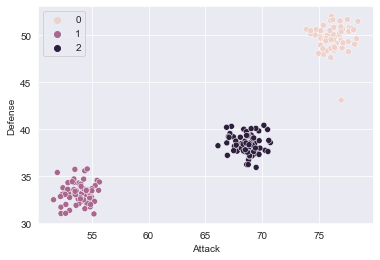

In [20]:
sns.scatterplot(df.Attack, df.Defense, spectral_predictions)

# **Кластеризация на основе плотности**

Такая кластеризация находит в датасете области с высокой плотностью и на их основе образует кластеры. Редкие объекты, которые находятся в отдалении от других данных и для которых нужен отдельный кластер, считаются шумом.

При кластеризации на основе плотности нам не нужно задавать количество кластеров — алгоритм сам определяет оптимальное число. Такой алгоритм кластеризации отлично справляется с выбросами и с данными произвольной формы.

Наиболее популярный алгоритм кластеризации на основе плотности — DBSCAN.

**DBSCAN (DENSITY-BASED SPATIAL CLUSTERING OF APPLICATIONS WITH NOISE)**

Преимущества алгоритма DBSCAN:

* В отличие от k-means, не нужно задавать количество кластеров — алгоритм сам определит оптимальное.
* Алгоритм хорошо работает с данными произвольной формы.
* DBSCAN отлично справляется с выбросами в датасетах.

Основные параметры для запуска DBSCAN:

* eps — это радиус, про который мы говорили выше, когда рассматривали алгоритм. Это один из важнейших параметров в алгоритме DBSCAN. Попробуйте изменять его и посмотрите, как будут меняться кластеры в зависимости от значения параметра. Если данные разрежённые, значение радиуса должно быть больше. Если же данные расположены довольно близко друг к другу, значение радиуса можно уменьшить.
* min_samples — задаёт необходимое количество точек, которое должно быть в заданном радиусе от точки, чтобы она считалась центральной.

c:\Users\kuzin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

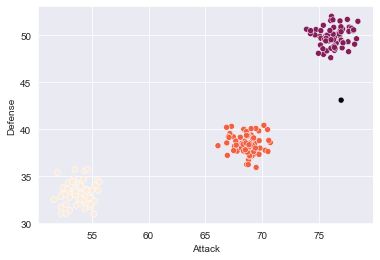

In [21]:
# импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(df.Attack, df.Defense, c=clustering.labels_)

# Понижение размерности

## PCA

**Метод главных компонент, или PCA (Principal Components Analysis)** — это один из базовых способов уменьшения размерности.

Для уменьшения размерности метод главных компонент проводит линейное преобразование пространства, которое сохраняет длины векторов. Таким образом происходит отображение признаков в новое пространство с меньшей размерностью.

В новом пространстве появляются новые оси. Они строятся таким образом, что для первой оси дисперсия данных должна быть максимальной, а вторая ось ортогональна первой и имеет максимально возможную дисперсию.

Первой главной компонентой будет называться первая ось в новом пространстве.

In [22]:
# из модуля decomposition библиотеки sklearn импортируем класс PCA
from sklearn.decomposition import PCA
# создаём объект класса PCA
# n_components — задаём количество компонентов для проведения трансформации
pca = PCA(n_components=2, random_state=42)
# обучаем модель на данных X
pca.fit(X)
# применяем уменьшение размерности к матрице X
pca.transform(X)

array([[-1.53791623e+01, -1.75785186e+00],
       [-2.98130699e-01,  1.70345815e+00],
       [-1.21550937e+01, -8.20419437e-02],
       [-1.54713149e+01, -1.55547869e+00],
       [-5.02838962e-01,  3.47247556e+00],
       [ 1.37978799e+01, -9.48484290e-01],
       [-1.38672909e+01, -1.90460153e+00],
       [ 1.56042734e+01, -2.04379217e+00],
       [ 1.23973059e+01, -3.03803696e+00],
       [ 1.35571148e+01, -4.19682231e-01],
       [-1.02492988e+01,  4.10148415e+00],
       [ 1.42731502e+01, -1.93227169e+00],
       [ 1.36209197e+01, -2.32057076e+00],
       [-1.47947825e+01, -3.60979573e+00],
       [-8.47057375e-01,  2.65027440e+00],
       [-1.50892757e+01, -1.41397822e+00],
       [ 1.44553459e+01, -5.71218663e-01],
       [-1.31112390e+00,  2.34495748e+00],
       [-3.18459401e+00,  2.83858850e+00],
       [ 1.21036156e+01, -1.58541953e+00],
       [-1.27073038e+01, -2.50795483e+00],
       [ 1.37002034e+01, -8.42461471e-02],
       [ 1.44492306e+01, -4.30914860e+00],
       [ 1.

In [24]:
# загрузим датасет MNIST
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

dataset = fetch_openml("mnist_784")

In [25]:

# загрузим признаки в переменную X  
X = dataset['data']
# загрузим «ответы» в переменную y
y = dataset['target']
# разделим данные с помощью sklearn на данные для обучения и теста
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=0)

# импортируем StandardScaler для стандартизации данных
from sklearn.preprocessing import StandardScaler

# создадим объект класса StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
# трансформируем датасеты train_x и test_x
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

# импортируем класс PCA
from sklearn.decomposition import PCA

# создадим объект класса PCA
pca = PCA(n_components=300)
pca.fit(train_x)
# уменьшим размерность данных
train_x_pca = pca.transform(train_x)
test_x_pca = pca.transform(test_x)

In [26]:
print(len(train_x[0]))
print(len(train_x_pca[0]))

784
300


Напишем функцию, которая будет принимать на вход данные для обучения (матрицу с признаками и правильные ответы) и данные для тестирования модели, а на выходе будет возвращать время, затраченное на обучение модели, и качество модели. В качестве метрики оценивания качества будем использовать метрику accuracy.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# напишем функцию, которая на вход принимает X и y, а возвращает модель и время
def get_time_and_accuracy(train_x, train_y, test_x, test_y):
    # создадим объект класса LogisticRegression
    log_reg_model = LogisticRegression(max_iter=1000)
    from time import time
    # запишем время с начала эпохи в секундах до обучения модели
    start_time = time()
    # обучим модель
    log_reg_model.fit(train_x, train_y)    
    # запишем время с начала эпохи в секундах после обучения
    end_time = time()
    # подсчитаем время, потраченное на обучение модели
    time = end_time-start_time
    # предскажем на тестовых данных
    y_pred = log_reg_model.predict(test_x)
    # посчитаем скор для тестового предсказания
    score = accuracy_score(test_y, y_pred)
    # вернём время, потраченное на обучение, и качество полученной модели
    return time, score

model_pca_time, model_pca_acc = get_time_and_accuracy(train_x_pca, train_y, test_x_pca, test_y)
print(f"Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения {model_pca_time}, метрика модели {model_pca_acc}")
# Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения 54.12072825431824, метрика модели 0.9255714285714286

model_time, model_acc = get_time_and_accuracy(train_x, train_y, test_x, test_y)
print(f"Модель, построенная на всех исходных признаках. Время обучения {model_time}, метрика модели {model_acc}")
# Модель, построенная на всех исходных признаках. Время обучения 108.04033303260803, метрика модели 0.9187142857142857

Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения 75.7547402381897, метрика модели 0.925
Модель, построенная на всех исходных признаках. Время обучения 155.36580395698547, метрика модели 0.9187142857142857


В реальной работе бывает гораздо больше данных и на обучение модели уходит отнюдь не две минуты. Таким образом, применив технику уменьшения размерности, можно существенно сэкономить время.

## T-SNE

Для того чтобы визуализировать многомерное пространство признаков, необходимо уменьшить его размерность до двухмерного или трёхмерного. В этом поможет t-SNE (t-distributed Stochastic Neighbor Embedding), что переводится с английского как «стохастическое вложение соседей с t-распределением». 

t-SNE, в отличие от PCA, использует технику нелинейного снижения размерности данных. Обычно используется снижение размерности многомерного пространства до двух- или трёхмерного с целью дальнейшей визуализации. При преобразовании похожие объекты оказываются рядом, а непохожие — далеко друг от друга.

Важные параметры для запуска:

* n_components — размерность нового пространства.
* perplexity — один из важнейших параметров для запуска. Этот параметр описывает ожидаемую плотность вокруг точки. Таким образом мы можем устанавливать соотношение ближайших соседей к точке. Если датасет большой, стоит установить большее значение perplexity. Обычно используют значения в диапазоне от 5 до 50.
* n_iter — количество итераций для оптимизации.
* random_state — так как в алгоритме есть случайность, задание random_state позволяет от запуска к запуску получать одинаковые результаты.

In [28]:
# импортируем класс TSNE из модуля manifold библиотеки sklearn
from sklearn.manifold import TSNE

# создаём объект класса TSNE
# n_components — размерность нового пространства
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# обучаем модель на данных X
tsne.fit(X)
# применяем уменьшение размерности к матрице X
tsne.transform(X)

c:\Users\kuzin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\kuzin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


KeyboardInterrupt: 

<AxesSubplot:xlabel='0', ylabel='1'>

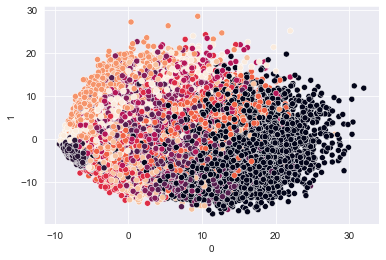

In [29]:
import seaborn as sns

# создадим объект класса PCA, уменьшим размерность данных до 2
pca = PCA(n_components=2, random_state=42)

# уменьшим размерность данных
X_reduced = pca.fit_transform(train_x)
# сохраним данные в датафрейм
df_pca = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_pca['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
# визуализируем
sns.scatterplot(x=df_pca[0], y=df_pca[1], c=df_pca['c'])

c:\Users\kuzin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\kuzin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

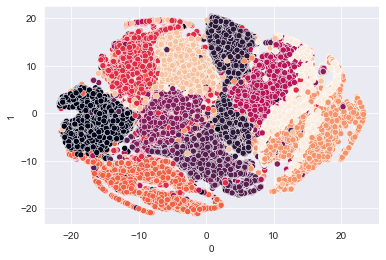

In [30]:
# создадим объект класса TSNE, уменьшим размерность данных до 2
tsne = TSNE(n_components=2, perplexity=50, n_iter=500, random_state=42)
# немного уменьшим количество объектов для уменьшения размерности, иначе алгоритм будет работать очень долго
X_reduced = tsne.fit_transform(train_x)
# сохраним данные в датафрейм
df_tsne = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_tsne['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], c=df_tsne['c'])